In [ ]:
import pymongo
conn = pymongo.MongoClient('mongodb://192.168.20.15', 27017)
db = conn.brewpiless
collection = db.beer    
 
beername = 'beertest'
beerstyle = ''
ret = ''      
if beername == '' and beerstyle == '':
   #busca tudo  
   ret = list(collection.find())
   if ret:
       print(ret)
       print('if')
elif beername != '':
    #busca NAME           
    ret = dict(collection.find_one({"beername": beername}))
    if ret:
       print(ret)          
       print('elif')

In [1]:
import pymongo
import numpy as np
import pandas as pd
conn = pymongo.MongoClient('mongodb://192.168.20.15', 27017)
db = conn.brewpiless
collection = db.brewpiless    
    
#convert entire collection to Pandas dataframe
dfbrew = pd.DataFrame(list(collection.find()))

In [2]:
dfbrew.head()

,_id,beername,created,beertemp,fridgetemp,beerset,fridgeset,temproom,tempaux,externalvolt,tempmode,modeinint,finished
0,5e770737133baf3112ece588,beertest,"22/03/2020, 17:34:44",22.9,24.1,21.0,11.7,None,None,None,C,b,NaN
1,5e770773133baf3112ece589,beertest,"22/03/2020, 17:35:44",22.8,24.1,21.0,11.7,None,None,None,C,b,NaN
2,5e7707af133baf3112ece58a,beertest,"22/03/2020, 17:36:44",22.8,24.1,21.0,11.7,None,None,None,C,b,NaN
3,5e7707eb133baf3112ece58b,beertest,"22/03/2020, 17:37:44",22.8,24.1,21.0,11.7,None,None,None,C,b,NaN
4,5e770827133baf3112ece58c,beertest,"22/03/2020, 17:38:44",22.8,24.1,21.0,11.7,None,None,None,C,b,NaN


In [27]:

dfbrew['created'] = pd.to_datetime(dfbrew['created'])
dfbrew['beertemp'] = dfbrew['beertemp'].astype('float') 
final_df = dfbrew.sort_values('created', ascending=True) 

<bound method NDFrame.head of                           _id  beername             created  beertemp  \
0    5e770737133baf3112ece588  beertest 2020-03-22 17:34:44      22.9   
1    5e770773133baf3112ece589  beertest 2020-03-22 17:35:44      22.8   
2    5e7707af133baf3112ece58a  beertest 2020-03-22 17:36:44      22.8   
3    5e7707eb133baf3112ece58b  beertest 2020-03-22 17:37:44      22.8   
4    5e770827133baf3112ece58c  beertest 2020-03-22 17:38:44      22.8   
..                        ...       ...                 ...       ...   
307  5e7892dd133baf3112ece6bb  beertest 2020-03-23 21:42:46      21.0   
308  5e789319133baf3112ece6bc  beertest 2020-03-23 21:43:43      20.9   
309  5e789355133baf3112ece6bd  beertest 2020-03-23 21:44:43      20.9   
310  5e789392133baf3112ece6be  beertest 2020-03-23 21:45:53      20.9   
311  5e7893ce133baf3112ece6bf  beertest 2020-03-23 21:46:43      20.9   

    fridgetemp beerset fridgeset temproom tempaux externalvolt tempmode  \
0         24.1    

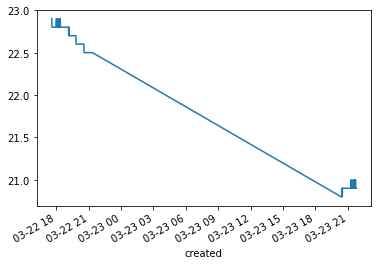

In [28]:
import matplotlib
dfbrew.index
dfbrew.set_index('created')['beertemp'].plot();